# Cognifyz Data Science Internship: A Project on Restaurant Rating Prediction

**Author:**  Shadab Ashraf 

In [1]:
## Load the Libraries:-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


import folium 
from folium.plugins import MarkerCluster

from geopy.geocoders import Nominatim
import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
## Load the Data Set:-

data  = pd.read_csv("D:\Intership\Dataset .csv")

<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
C:\Users\SA\AppData\Local\Temp\ipykernel_17616\243351859.py:3: SyntaxWarning: invalid escape sequence '\I'
  data  = pd.read_csv("D:\Intership\Dataset .csv")


In [3]:
## Showing the First 5 rows of Dataset.

data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
## Showing the last 5 rows of Dataset.

data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
## No of Rows and Columns in Dataset.

data.shape

(9551, 21)

* No of rows = 9551
* No of Columns = 21

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Types of Data Type :- Mix of Data Types(Numeric:- int, float) and (Categorical :- object)

In [7]:
## Checking for Null Values in Dataset.

null_values = data.isnull().sum()
null_values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
null_values_info =null_values[null_values >0].sort_values(ascending = False)
null_values_info

Cuisines    9
dtype: int64

Here we can see that only column[(Cuisines)] has total [9] missing values.


And now we have to tackel these by filling the missing values by [Unknown]

In [9]:
## Replacing the Missing Values with "Unknown".

data["Cuisines"].fillna("Unknown", inplace  = True)

C:\Users\SA\AppData\Local\Temp\ipykernel_17616\1450146525.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Cuisines"].fillna("Unknown", inplace  = True)


In [10]:
## Again Checking for Null Values in Dataset.

data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

As we can see we have successfully removed the null values .

Now we can move further

#### Now we have to analyze the distribution of the Variable["Agrregate ratings"]


In [11]:
## Cheking the no of Ratings.
ratings = data["Aggregate rating"].value_counts().sort_index()
print(ratings.head())
print(ratings.tail())


Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
Name: count, dtype: int64
Aggregate rating
4.5    95
4.6    78
4.7    42
4.8    25
4.9    61
Name: count, dtype: int64


As we can see:-
* Ratings ranges from (0 to 4.9)
* There is 2148 restaurants which have zero(0) rating.

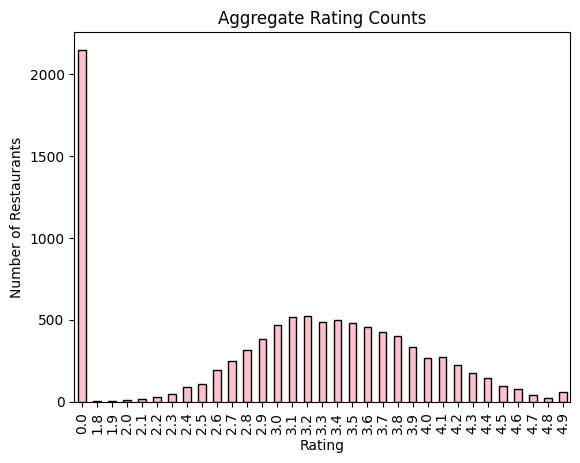

In [12]:
# Ploting the ratings count.

ratings.plot(kind='bar', color="pink", edgecolor="black")
plt.title("Aggregate Rating Counts")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.show()

1. Rating (0.0)
* More than 2000 restaurants have a rating of 0.0.

2. Ratings between (1.0–2.0) :-
* Very few restaurants fall here. The bars are almost flat.

3. Ratings (2.5–4.0):
* This is where most restaurants are.
* The peak is around 3.0–3.4, with each bin having around 400–500 restaurants.
* This means that the Majority are " Average" quality restaurants.

4. Ratings above (4.0):
* Very Few restaurants are there as the ratings increases.
* Means that very few restaurants are actually Good.

We can use another plot to see the distribution:-

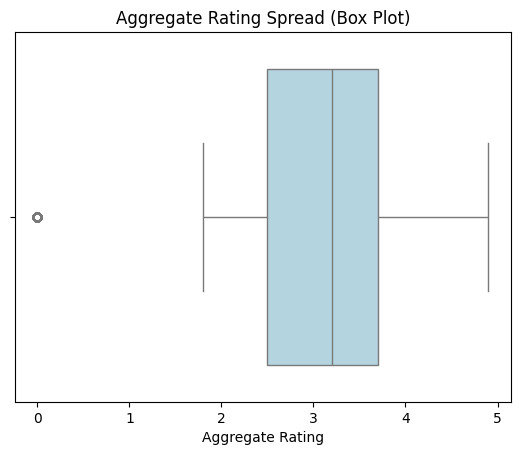

In [13]:
# Box plot of ratings
sns.boxplot(x=data["Aggregate rating"], color="lightblue")
plt.title("Aggregate Rating Spread (Box Plot)")
plt.xlabel("Aggregate Rating")
plt.show()


1. The majority of restaurants are rated between 2.5 and 3.8.
2. The median rating is about 3.3 (average quality).
3. Ratings mostly fall between 2.0 and 4.8.
4. The 0.0 ratings appear as outliers, meaning many restaurants have no rating or are unrated, which doesn’t follow the normal pattern.

We can also see that Distribution is skewed (many low ratings, fewer high ratings).

#### Imbalance In this Variable [Agrregate_Ratings].

* The target variable (Aggregate rating) is highly imbalanced, with a large share of restaurants having a 0.0 rating. This imbalance must be addressed in later tasks through special handling such as resampling, class weighting, or treating 0.0 as a separate “No Rating” category.

## TASK - 2

* ### Descriptive Analysis

1. ##### Calculate the Basic Statistical Measures for numerical Values:-

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

As we can see, There is 5 Numarical Columns (["Restaurant Id", "Aggregate rating", "Votes", "Average Cost for two", "Price range"]) out of 20 columns . 
Here we can Leave the resturant Id Column.

Now we have to find there statistical measures:-

In [15]:
data[["Aggregate rating", "Votes", "Average Cost for two", "Price range"]].mean()

Aggregate rating           2.666370
Votes                    156.909748
Average Cost for two    1199.210763
Price range                1.804837
dtype: float64

* On Average, restaurants have a rating 2.67 and around 167 votes.
* The Average cost for two people is roughly around ₹1200.

In [17]:
data[["Aggregate rating", "Votes", "Average Cost for two", "Price range"]].median()

Aggregate rating          3.2
Votes                    31.0
Average Cost for two    400.0
Price range               2.0
dtype: float64

In [18]:
data[["Aggregate rating", "Votes", "Average Cost for two", "Price range"]].mode()

,Aggregate rating,Votes,Average Cost for two,Price range
0,0.0,0,500,1


* We know that the mode shows the most common value. Since around 2000 restaurants have a rating of 0.0, the mode of [“ratings”] is 0.0.

In [19]:
data[["Aggregate rating", "Votes", "Average Cost for two", "Price range"]].max()

Aggregate rating             4.9
Votes                    10934.0
Average Cost for two    800000.0
Price range                  4.0
dtype: float64

In [20]:
data[["Aggregate rating", "Votes", "Average Cost for two", "Price range"]].min()

Aggregate rating        0.0
Votes                   0.0
Average Cost for two    0.0
Price range             1.0
dtype: float64

In [21]:
data[["Aggregate rating", "Votes", "Average Cost for two", "Price range"]].std()

Aggregate rating            1.516378
Votes                     430.169145
Average Cost for two    16121.183073
Price range                 0.905609
dtype: float64

In [22]:
data[["Aggregate rating", "Votes", "Average Cost for two", "Price range"]].quantile(0.25)

Aggregate rating          2.5
Votes                     5.0
Average Cost for two    250.0
Price range               1.0
Name: 0.25, dtype: float64

In [23]:
data[["Aggregate rating", "Votes", "Average Cost for two", "Price range"]].quantile(0.5)

Aggregate rating          3.2
Votes                    31.0
Average Cost for two    400.0
Price range               2.0
Name: 0.5, dtype: float64

In [24]:
data[["Aggregate rating", "Votes", "Average Cost for two", "Price range"]].quantile(0.75)

Aggregate rating          3.7
Votes                   131.0
Average Cost for two    700.0
Price range               2.0
Name: 0.75, dtype: float64

* Till now we calculated statistical measures one by one, but using the describe() function, we can quickly get most of them (mean, std, min, max, quartiles) in a single table.

In [25]:
data[["Aggregate rating", "Votes", "Average Cost for two", "Price range"]].describe()

,Aggregate rating,Votes,Average Cost for two,Price range
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,2.666370,156.909748,1199.210763,1.804837
std,1.516378,430.169145,16121.183073,0.905609
min,0.000000,0.000000,0.000000,1.000000
25%,2.500000,5.000000,250.000000,1.000000
50%,3.200000,31.000000,400.000000,2.000000
75%,3.700000,131.000000,700.000000,2.000000
max,4.900000,10934.000000,800000.000000,4.000000


We are done with the stats summary of numerical columns.
Now we will move to Categorical Analysis. 

2. Categorical variables Analysis.
* Country wise Restaurants.

In [16]:
a = data["Country Code"].value_counts()
a

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

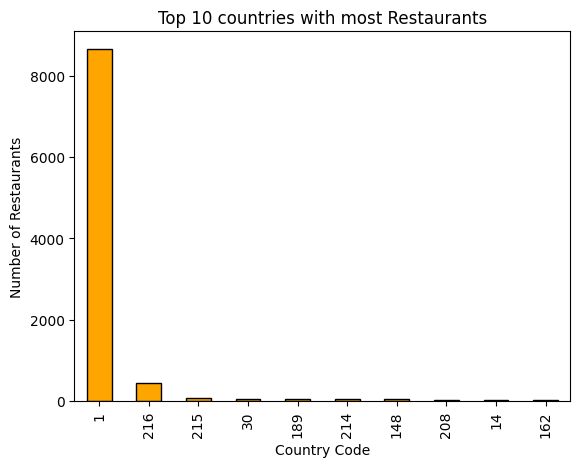

In [17]:
a.head(10).plot(kind='bar', color="orange", edgecolor="black")
plt.title("Top 10 countries with most Restaurants")
plt.xlabel("Country Code")
plt.ylabel("Number of Restaurants")
plt.show()

* Country with Code 1 dominates the dataset. It has more than 8,500 restaurants.

* Country with  Code 216 comes second, with only around 400 restaurants.

* Other countries like 215, 30, 189,214, 148, 208, 14, and 162 have very few restaurants.

* Overall, the dataset is skewed towards Counrty with Code 1, while the contribution from other Country is very small.

* City wise Restaurants.

In [19]:
b = data["City"].value_counts()

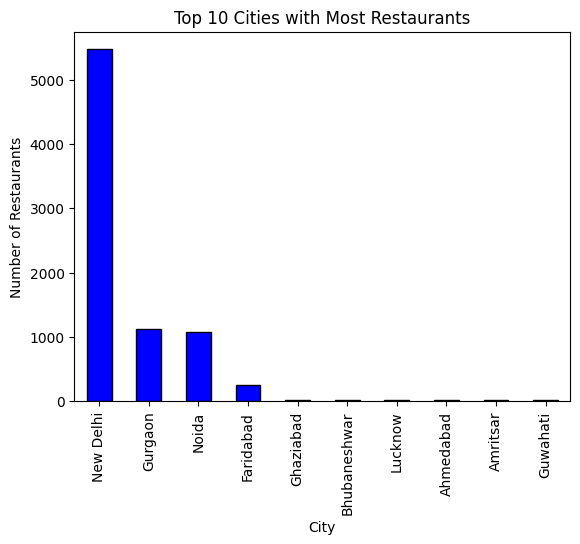

In [20]:
b.head(10).plot(kind="bar", color="blue", edgecolor="black")
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()


* New Delhi dominates the dataset having 5,000 restaurants.

* Gurgaon and Noida follow next, each with around 1,000+ restaurants.

* Other cities like Faridabad, Ghaziabad, Bhubaneswar, Lucknow, Ahmedabad, Amritsar, and Guwahati have very few restaurants compared to New Delhi.

* Cuisine wise Restaurants.

In [21]:
# Count restaurants by cuisines
c = data["Cuisines"].value_counts()
print(c)


Cuisines
North Indian                        936
North Indian, Chinese               511
Fast Food                           354
Chinese                             354
North Indian, Mughlai               334
                                   ... 
Kebab, Turkish Pizza, D�_ner          1
World Cuisine, Mexican, Italian       1
World Cuisine                         1
Kebab, Izgara                         1
Seafood, Asian, Filipino, Indian      1
Name: count, Length: 1826, dtype: int64


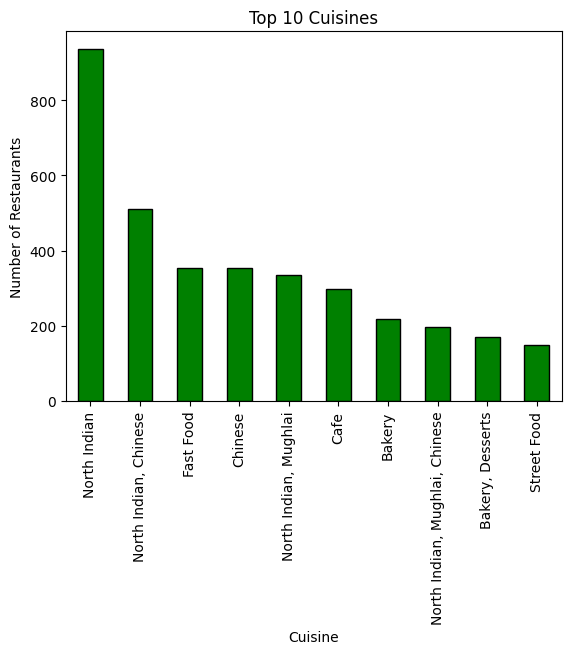

In [22]:
c.head(10).plot(kind="bar", color="green", edgecolor="black")
plt.title("Top 10 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.show()


* North Indian is the most popular cuisine with having 950+ restaurants.

* North Indian + Chinese is also very common, with around 500 restaurants.

* Fast Food and Chinese are almost equal in popularity, both around 350 restaurants.

* North Indian + Mughlai and Cafe are also quite popular, with 300–330 restaurants each.

* Bakery and Mughlai + Chinese have a moderate presence (200–220 restaurants).

* Bakery + Desserts and Street Food are less frequent (150–170 restaurants).

* Overall, North Indian dominates the chart, while Chinese, Fast Food, and Cafe are other key categories in demand.

##### Summary of Task-02

* 1. First:-
 * I explored the numerical columns like Aggregate Rating, Votes, Average Cost for Two, and Price Range.
 * The average rating was around 2.6–3.2.
 * The mode of ratings turned out to be 0 because 2000+ restaurants don’t have any ratings.


* 2. Then I checked categorical columns:-
 * Country Code: Most of the data comes from (Code 1), while other countries contribute very little.
 * Cities: New Delhi dominates with 5000+ restaurants, followed by Gurgaon and Noida.
 * Cuisines: North Indian is the most popular cuisine, then Chinese and Fast Food.


* 3. Visualizations helped to confirm:-
 * Bar charts showed the dataset is heavily India-dominated.
 * Top 10 cities and cuisines made it clear that New Delhi and North Indian food take the lead.

## TASK - 03

#### Geospatial Analysis.

#### Our task is to Visualize the locations of restaurants on a map using latitude and longitude information.

* ##### For visualizing the loaction of restaurants on map we have:-

In [13]:
## first we see the Longitude and latitude Column

data[['Longitude','Latitude']]

,Longitude,Latitude
0,121.027535,14.565443
1,121.014101,14.553708
2,121.056831,14.581404
3,121.056475,14.585318
4,121.057508,14.584450
...,...,...
9546,28.977392,41.022793
9547,29.041297,41.009847
9548,29.034640,41.055817
9549,29.036019,41.057979


In [14]:
## After that we craete a Map object
map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=6)

* Here , we made a map using Folium. For center of the map, we used the mean of longitute and latitude so the map opens in the middle of all restaurants.

* This way we can see all restaurants clearly and not just one city.

In [15]:
## Now, Convert coordinates to list of [lat, lon]
coordinates = data[['Latitude','Longitude']].values.tolist()

* Now We have convert Latitude and Longitude into a list of [lat, lon] because mapping libraries need coordinates in list format. 

* Instead of using separate columns every time, we make one list where each element looks like [28.6, 77.2] (Delhi). This makes it easier to plot multiple points on the map.

In [16]:
## Add FastMarkerCluster
MarkerCluster(coordinates).add_to(map)

## Save the Map.
map.save("restaurants_map.html")

print("Map saved -> restaurants_map.html (open in browser)")

Map saved -> restaurants_map.html (open in browser)


* FastMarkerCluster groups nearby restaurant markers into bubbles (Clusters).

* If you zoom out, instead of showing thousands of individual points, it shows clusters (like “20” restaurants here).

* When you zoom in, the cluster breaks down into smaller groups or single points.

* This makes the map load faster and easier to read.

* After that we save the map as an HTML file and we have to open it in any browser.

##### Now we Analyze the distribution of restaurants across different cities.

1. First count No of Restaurants Per City

In [18]:
city_counts = data['City'].value_counts()
city_counts.head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64

2. Now vizualize it with diff Plots

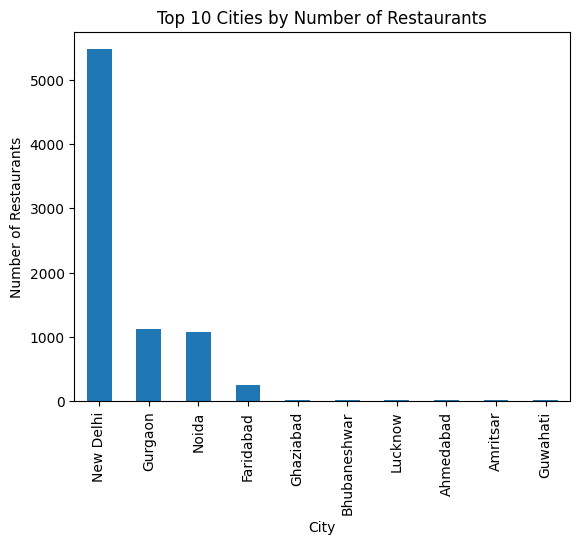

In [19]:
## Bar Plot
city_counts.head(10).plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.title("Top 10 Cities by Number of Restaurants")
plt.show()


## LEVEL - 02
### TASK - 01


##### 1. Determining the percentage of restaurants that offer table booking and online delivery.

In [31]:
## FOR TABLE BOOKING

print(f"Percentage of Restaurants who offers {data["Has Table booking"].value_counts(normalize=True)*100}")

Percentage of Restaurants who offers Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64


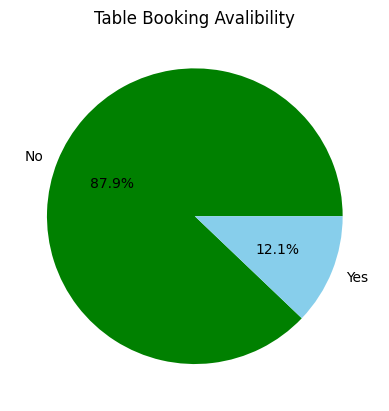

In [32]:
data["Has Table booking"].value_counts().plot.pie(autopct = '%1.1f%%', title = "Table Booking Avalibility", colors=["green","skyblue"] )
plt.ylabel("")
plt.show()

We can see that Only about 12% of restaurants offer Table Booking while a big 88% restaurants do not have this Service.

In [33]:
## FOR ONLINE DELIVERY

print(f"Percentage of Restaurants who offers {data["Has Online delivery"].value_counts(normalize=True)*100}")

Percentage of Restaurants who offers Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


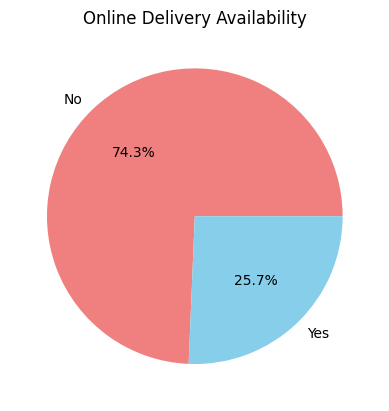

In [34]:
data["Has Online delivery"].value_counts().plot.pie(autopct ='%1.1f%%', title = "Online Delivery Availability", colors = ['lightcoral', 'skyblue'])
plt.ylabel("")
plt.show()

Here the percenatge of restaurants who offers online delivery is very low(25.6%) and (74%) restaurants do not offer this offers.

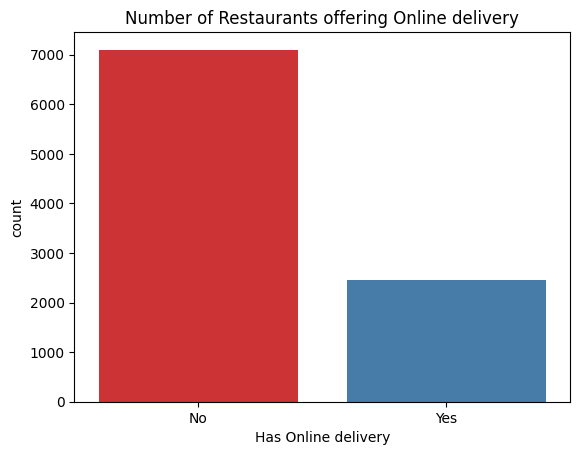

In [35]:
sns.countplot(x="Has Online delivery", hue="Has Online delivery", data=data, palette="Set1")
plt.title("Number of Restaurants offering Online delivery")
plt.show()

We can clearly see that restaurants without delivery are much more (7000+) compared to those with delivery (2500).

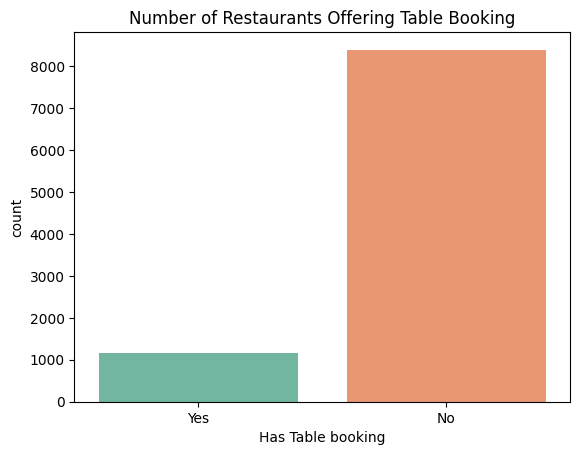

In [36]:
sns.countplot(x='Has Table booking', hue="Has Table booking",data=data, palette='Set2')
plt.title("Number of Restaurants Offering Table Booking")
plt.show()

We can see that most restaurants (8,400) don’t offer table booking, while only a few (1,200) do, which show people prefer walk-in.

#### 2. Compare the Average Ratings of Restaurants with table Bookings and those Without it.

In [37]:

# Grouping the 'Has Table booking' column and Aggregate Ration by calculation the mean rating.

avg_rating_table = data.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()

print(avg_rating_table) 

  Has Table booking  Aggregate rating
0                No          2.559359
1               Yes          3.441969


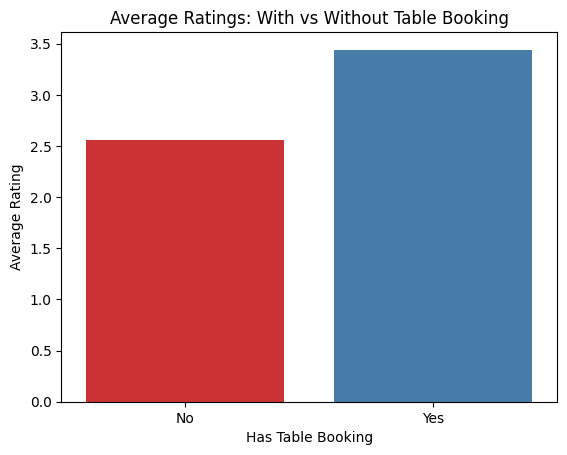

In [38]:
# Plotting the same

sns.barplot(x='Has Table booking', y='Aggregate rating',hue="Has Table booking", data=avg_rating_table, palette='Set1')
plt.title("Average Ratings: With vs Without Table Booking")
plt.xlabel("Has Table Booking")
plt.ylabel("Average Rating")
plt.show()


Here We can see that Restaurants with table booking generally receive better ratings than those without.
Customers seem to appreciate the convenience of being able to book a table.

#### 3. Analyze the availability of online delivery among restaurants with different price ranges

In [39]:
## Grouping the Restaurants by price range and online delivery

Delivery_Price_range = data.groupby(["Price range", "Has Online delivery"]).size().reset_index(name='Count')
print(Delivery_Price_range)

   Price range Has Online delivery  Count
0            1                  No   3743
1            1                 Yes    701
2            2                  No   1827
3            2                 Yes   1286
4            3                  No    997
5            3                 Yes    411
6            4                  No    533
7            4                 Yes     53


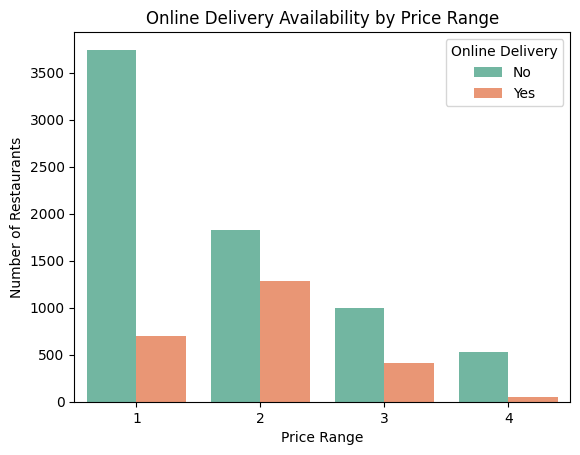

In [40]:
## Plotting the same

sns.barplot(x='Price range', y='Count', hue='Has Online delivery', data = Delivery_Price_range, palette='Set2')
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.legend(title="Online Delivery")
plt.show()

Here we can see that When it comes to online delivery, it is more common in lower and mid price ranges (1 & 2) compared to the higher price ranges (3 & 4). As the price range goes up, the availability of online delivery decreases significantly.

So Affordable restaurants focus more on online delivery, while higher-end restaurants focus more on dine-in experience with table booking, which also leads to higher ratings.

### Overall Summary.
1. Most restaurants don’t give table booking, only around 12% do, so it’s very rare. Walk-ins are the main thing.

2. For online delivery, only 1 out of 4 restaurants give it (~26%), while most (~74%) don’t.

3. Restaurants with table booking have better ratings (around 3.4) than those without (around 2.6). So booking option improves customer experience.

4. Also, cheap restaurants (low price range) are the ones giving more delivery, but as price range goes up, delivery gets less common.

### TASK - 02

##### 1. Determine the most common price range among all the restaurants.

In [41]:
data["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [42]:
most_common_price = data["Price range"].mode()    ## Mode give the most common/ most occured value.
most_common_price

0    1
Name: Price range, dtype: int64

Here, We have (1) is the most common price range among restaurants.

We can also vizualize this:-


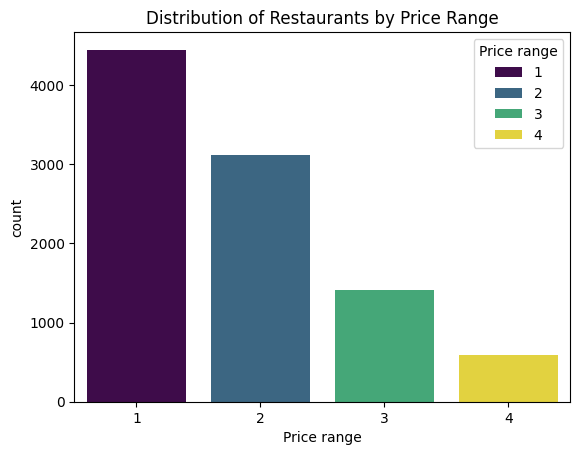

In [43]:
sns.countplot(x = "Price range", hue="Price range",data=data, palette='viridis')
plt.title("Distribution of Restaurants by Price Range")
plt.show()

##### Here what we have concluded after analyzing it:-
1. Most restaurants fall into the lowest price range (1), followed by price range 2.
2. Fewer restaurants are in the higher price ranges (3 and 4), with price range 4 having the least.
3. This shows that budget-friendly restaurants dominate, while expensive ones are rare.

##### 2. Calculate the average rating for each price range, And Identify the color that represents the highest average rating among different price ranges.

In [44]:
data["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [45]:
avg_rating_by_price = data.groupby("Price range")["Aggregate rating"].mean().reset_index()

In [47]:
print("Avergae ratings for each price range is :- ")
print(avg_rating_by_price)

Avergae ratings for each price range is :- 
   Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918


In [46]:
highest_avg_rating = avg_rating_by_price["Aggregate rating"].max()

best_price_range = avg_rating_by_price["Price range"][avg_rating_by_price["Aggregate rating"].idxmax()]

best_color = data[data["Price range"] == best_price_range]["Rating color"].value_counts().idxmax()


In [48]:
print("Price Range with Highest Average Rating:", best_price_range)
print("Highest Average Rating:", highest_avg_rating)
print("Color Representing Highest Average Rating:", best_color)

Price Range with Highest Average Rating: 4
Highest Average Rating: 3.8179180887372017
Color Representing Highest Average Rating: Yellow


## Summary:-

##### This analysis focused on the relationship between restaurant price ranges and their ratings.

1. Examined restaurant ratings across different price ranges to identify the top-performing category.

2. Calculated the average rating for each price range.

3. Found that Price Range 4 has the highest average rating (~3.82).

4. Filtered the dataset for Price Range 4 and identified that the most common rating color is Yellow, representing the highest-rated restaurants.

## LEVEL 03 - TASK - 01

### Feature Engineering:-


1. Create a new Column name [ Country Name ] manually using country code and city info.

In [63]:
# Check which cities belong to each country code
data.groupby('Country Code')['City'].unique()


Country Code
1      [Agra, Ahmedabad, Allahabad, Amritsar, Auranga...
14     [Armidale, Balingup, Beechworth, Dicky Beach, ...
30               [Bras�_lia, Rio de Janeiro, S��o Paulo]
37     [Chatham-Kent, Consort, Vineland Station, York...
94                  [Bandung, Bogor, Jakarta, Tangerang]
148                          [Auckland, Wellington City]
162    [Makati City, Mandaluyong City, Pasay City, Pa...
166                                               [Doha]
184                                          [Singapore]
189    [Cape Town, Inner City, Johannesburg, Pretoria...
191                                            [Colombo]
208                                  [Ankara, ��stanbul]
214                          [Abu Dhabi, Dubai, Sharjah]
215          [Birmingham, Edinburgh, London, Manchester]
216    [Albany, Athens, Augusta, Boise, Cedar Rapids/...
Name: City, dtype: object

There are a total of 15 unique country codes along with their corresponding cities.

Now, we will map the country codes to their corresponding country names and add a new column named COUNTRY to the dataset Manually.

In [64]:
#Creating mapping dictionary from our 15 country codes:-

country_map = {
    1: "India",
    14: "Australia",
    30: "Brazil",
    37: "Canada",
    94: "Indonesia",
    148: "New Zealand",
    162: "Philippines",
    166: "Qatar",
    184: "Singapore",
    189: "South Africa",
    191: "Sri Lanka",
    208: "Turkey",
    214: "UAE",
    215: "UK",
    216: "USA"
}


In [65]:
# Map country codes to names and create a new column
data['Country Names'] = data['Country Code'].map(country_map)


In [66]:
data["Country Names"].unique()

array(['Philippines', 'Brazil', 'USA', 'Australia', 'Canada', 'Singapore',
       'UAE', 'India', 'Indonesia', 'New Zealand', 'UK', 'Qatar',
       'South Africa', 'Sri Lanka', 'Turkey'], dtype=object)

Here, We can see we have successfully added the new column name (Country Name)

##### 2. Binary Encoding For Categorical Column.

* First , lets see how many categorical columns there are in the Data set.

In [67]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country Names'],
      dtype='object')


* These are the categorical columns in the dataset. From these, 

* we need to select only the one having two Categories and convert them into binary variables.

In [68]:
print(data["Switch to order menu"].value_counts())   
print(data["Has Online delivery"].value_counts())
print(data["Is delivering now"].value_counts())
print(data["Has Table booking"].value_counts())

Switch to order menu
No    9551
Name: count, dtype: int64
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64
Is delivering now
No     9517
Yes      34
Name: count, dtype: int64
Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64


We know the rule that we have to Drop columns with no or very low variance and we should keep columns with meaningful variation for the model.

So we should Drop:

Switch to order menu → all values are “No”, no variance, useless for ML

Is delivering now → almost all values “No”, adds noise, minimal impact

And Keep:

Has Online delivery → enough 0/1 variance, informative for model

Has Table booking → good 0/1 variance, useful for predictions

But we will keep this Column



In [69]:
data.replace({"Has Table booking":{"No":0, "Yes":1}, "Has Online delivery":{"No":0, "Yes":1}, "Is delivering now":{"No":0, "Yes":1}, "Switch to order menu":{"No":0, "Yes":1}}, inplace=True)

data.head(5)

C:\Users\SA\AppData\Local\Temp\ipykernel_3788\45832820.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"Has Table booking":{"No":0, "Yes":1}, "Has Online delivery":{"No":0, "Yes":1}, "Is delivering now":{"No":0, "Yes":1}, "Switch to order menu":{"No":0, "Yes":1}}, inplace=True)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Names
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,1,0,0,0,3,4.8,Dark Green,Excellent,314,Philippines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,1,0,0,0,3,4.5,Dark Green,Excellent,591,Philippines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,1,0,0,0,4,4.4,Green,Very Good,270,Philippines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,0,0,0,4,4.9,Dark Green,Excellent,365,Philippines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,1,0,0,0,4,4.8,Dark Green,Excellent,229,Philippines


##### 3. Transform the Column (Average Cost for two) into INR Currency.

* We have Column (Average Cost for two people) in different currencies like Pula, Real, INR, AED, etc.

* So the problem is thatML algorithms treat numeric values as numbers, but 1000 Pula ≠ 1000 INR.

* And Feeding raw values will confuse the model, as it won’t know which values are actually expensive.

* So Our Goal is to Convert all prices to one standard currency (INR).

In [70]:
## First, we wil see How many unique currencies are there in the dataset.

data["Currency"].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(��)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [71]:
## Now, we will Create a dictionary with conversion rates to INR.

conversion_rates = {
    "Botswana Pula(P)": 6.0,               # 1 Pula = 6 INR
    "Brazilian Real(R$)": 15.0,            # 1 Real = 15 INR
    "Dollar($)": 83.0,                     # 1 USD = 83 INR
    "Emirati Diram(AED)": 23.0,            # 1 AED = 23 INR
    "Indian Rupees(Rs.)": 1.0,             # 1 INR = 1 INR
    "Indonesian Rupiah(IDR)": 0.0055,      # 1 IDR = 0.0055 INR
    "NewZealand($)": 50.0,                 # 1 NZD = 50 INR
    "Pounds(��)": 102.0,                 # 1 GBP = 102 INR
    "Qatari Rial(QR)": 23.0,               # 1 QAR = 23 INR 
    "Rand(R)": 4.5,                        # 1 ZAR = 4.5 INR
    "Sri Lankan Rupee(LKR)": 0.22,         # 1 LKR = 0.22 INR
    "Turkish Lira(TL)": 4.5                # 1 TRY = 4.5 INR
}

In [72]:
##  Now Convert all prices to INR
data["Average Cost for Two in INR"] = data.apply(
    lambda row: row["Average Cost for two"] * conversion_rates[row["Currency"]],
    axis=1
)


In [25]:
data.head(5 )

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Names,Average Cost for Two in INR
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,0,0,0,3,4.8,Dark Green,Excellent,314,Philippines,6600.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,0,0,0,3,4.5,Dark Green,Excellent,591,Philippines,7200.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,0,0,0,4,4.4,Green,Very Good,270,Philippines,24000.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,0,0,4,4.9,Dark Green,Excellent,365,Philippines,9000.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,0,0,0,4,4.8,Dark Green,Excellent,229,Philippines,9000.0


Now, We have converted all prices to a standard currency using exchange rates.


So, Our ML algorithms can automatically compare values in different currencies.

##### 4. Feature Enginnering on Cuisines.

* We want to extract the number of cuisines present in a single record of the Cuisines column, because the more cuisines a restaurant offers, the more people it attracts.

In [73]:
data["Cuisines_Counts"] = data["Cuisines"].apply(lambda x: len(x.split(',')) if x != "Unknown" else 0)

In [74]:
data["Cuisines_Counts"].unique()

array([3, 1, 4, 2, 0, 5, 6, 7, 8])

In [75]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country Names,Average Cost for Two in INR,Cuisines_Counts
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,0,0,3,4.8,Dark Green,Excellent,314,Philippines,6600.0,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,0,0,3,4.5,Dark Green,Excellent,591,Philippines,7200.0,1


We have successfully added the new column and extracted the values also.

##### 5. Dropping the Unnecessary Columns.

* We will drop the columns which is not usefull for our Ml Predictive Modeling.

In [76]:
drop_columns = ["Restaurant ID","Restaurant Name","City","Country Code","Locality","Address", "Locality Verbose", "Longitude","Latitude","Cuisines","Average Cost for two","Currency",
                "Switch to order menu","Is delivering now","Rating color", "Rating text","Country Names"]

In [77]:
## Now crate a new dataframe by dropping the unnecessary columns.

Cleaned_Data = data.drop(columns=drop_columns)

In [78]:
Cleaned_Data.head(5)

,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,Average Cost for Two in INR,Cuisines_Counts
0,1,0,3,4.8,314,6600.0,3
1,1,0,3,4.5,591,7200.0,1
2,1,0,4,4.4,270,24000.0,4
3,0,0,4,4.9,365,9000.0,2
4,1,0,4,4.8,229,9000.0,2


##### 6. Now we will apply the Log transformation to skewed the (Votes) and (Average Cost for Two in INR).

In [80]:
Cleaned_Data["Votes"] = np.log1p(Cleaned_Data["Votes"])  

In [81]:
Cleaned_Data["Average Cost for Two in INR"] = np.log1p(Cleaned_Data["Average Cost for Two in INR"])

In [82]:
Cleaned_Data.head(5)

,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,Average Cost for Two in INR,Cuisines_Counts
0,1,0,3,4.8,5.752573,8.794976,3
1,1,0,3,4.5,6.383507,8.881975,1
2,1,0,4,4.4,5.602119,10.085851,4
3,0,0,4,4.9,5.902633,9.105091,2
4,1,0,4,4.8,5.438079,9.105091,2


As we can see , It has Fixed the extreme skewness in these Features.

##### 7. Now Standardize all the Numeric Columns.

In [35]:
scalar = StandardScaler()

scale_cols = ['Has Table booking', 'Has Online delivery', 'Price range','Votes', 'Cuisines_Counts','Average Cost for Two in INR']

Cleaned_Data[scale_cols] = scalar.fit_transform(Cleaned_Data[scale_cols])

In [36]:
Cleaned_Data.head(5)

,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,Average Cost for Two in INR,Cuisines_Counts
0,2.692181,-0.587547,1.319803,4.8,1.188688,2.785674,0.855876
1,2.692181,-0.587547,1.319803,4.5,1.498433,2.881770,-0.972252
2,2.692181,-0.587547,2.424090,4.4,1.114826,4.211530,1.769941
3,-0.371446,-0.587547,2.424090,4.9,1.262357,3.128216,-0.058188
4,2.692181,-0.587547,2.424090,4.8,1.034294,3.128216,-0.058188


## Summary:-

#### * Feature Engineering So Far

1. Country Name Mapping

* Converted numeric country codes to actual country names (e.g., 162 → Philippines) for better clarity.

2. Binary Encoding

* Converted columns like Has Table Booking and Has Online Delivery from Yes/No to 1/0.

* Dropped columns like Switch to order menu and Is delivering now because they don’t add meaningful information.

3. Currency Conversion

* Converted all values in Average Cost for Two to a single currency (INR) for consistency across countries.

4. Cuisines Feature Engineering

* Extracted Cuisine Count (number of cuisines per restaurant) from the text list of cuisines.

* Dropped the original textual Cuisines column.

5. Dropping Irrelevant Columns

* Removed columns like Restaurant ID, Name, Address, Longitude, Latitude, Currency, Rating text, etc., to reduce noise.

6. Log Transformation

* Applied log(1 + x) transformation on skewed features like Votes and Average Cost for Two to reduce the effect of extreme values.

7. Standardization

* Scaled numeric features (Votes, Cost, Cuisine Count, etc.) using StandardScaler (mean=0, std=1) to ensure equal contribution to ML algorithms.

## Level 03

### TASK - 01

### PREDICTIVE MODELING

##### * We have to Build a regression model to predict the aggregate rating of a restaurant based on the features:-

#####  .First, select the features (independent variables) and the target variable (dependent variable) and store them in separate variables.

In [85]:
Cleaned_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Has Table booking            9551 non-null   float64
 1   Has Online delivery          9551 non-null   float64
 2   Price range                  9551 non-null   float64
 3   Aggregate rating             9551 non-null   float64
 4   Votes                        9551 non-null   float64
 5   Average Cost for Two in INR  9551 non-null   float64
 6   Cuisines_Counts              9551 non-null   float64
dtypes: float64(7)
memory usage: 522.4 KB


In [86]:
x = Cleaned_Data[["Has Table booking","Has Online delivery","Price range","Votes","Cuisines_Counts","Average Cost for Two in INR"]]
y = Cleaned_Data["Aggregate rating"]

In [87]:
x

,Has Table booking,Has Online delivery,Price range,Votes,Cuisines_Counts,Average Cost for Two in INR
0,2.692181,-0.587547,1.319803,1.188688,0.855876,2.785674
1,2.692181,-0.587547,1.319803,1.498433,-0.972252,2.881770
2,2.692181,-0.587547,2.424090,1.114826,1.769941,4.211530
3,-0.371446,-0.587547,2.424090,1.262357,-0.058188,3.128216
4,2.692181,-0.587547,2.424090,1.034294,-0.058188,3.128216
...,...,...,...,...,...,...
9546,-0.371446,-0.587547,1.319803,1.639457,-0.972252,-0.424306
9547,-0.371446,-0.587547,1.319803,1.772691,0.855876,-0.124665
9548,-0.371446,-0.587547,2.424090,1.553298,-0.058188,0.406664
9549,-0.371446,-0.587547,2.424090,1.705167,-0.972252,0.022537


In [88]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

##### . Now split the data(independent variabel) into Training and Testing set.

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)   


#### Create our 1st Model.

#### 1. Linear Regression Model

In [90]:
model1 = LinearRegression()

Now , train our Modle on Training Data Set.

In [91]:
model1.fit(X_train, Y_train)

LinearRegression()

After Training the Data on Model, we will Seeing the performace of Tarining Data Testing Data.

In [92]:
train_predictions = model1.predict(X_train)

print("Linear Regression (Training Data)")
print(f"R2 Score: {r2_score(Y_train, train_predictions):.4}")
print(f"MAE: {mean_absolute_error(Y_train, train_predictions):.4}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, train_predictions)):.4}")

Linear Regression (Training Data)
R2 Score: 0.7231
MAE: 0.6799
RMSE: 0.7989


R² = 0.7231 → Explains ~72.3% of rating variation.

MAE = 0.6799 → Avg. error ≈ 0.68 points.

RMSE = 0.7989 → Typical error ≈ 0.80 points.

In [93]:
# Testing Data Performance
test_pred = model1.predict(X_test)
print("Linear Regression (Testing Data)")
print(f"R2 Score: {r2_score(Y_test, test_pred):.4f}")
print(f"MAE: {mean_absolute_error(Y_test, test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, test_pred)):.4f}")

Linear Regression (Testing Data)
R2 Score: 0.7209
MAE: 0.6772
RMSE: 0.7971


R² = 0.7209 → Explains ~72.1% of unseen variation.

MAE = 0.6772 → Avg. error ≈ 0.68 points.

RMSE = 0.7971 → Typical error ≈ 0.80 points.

#### Summary of this Model

* Train and test almost identical which mean no overfitting/underfitting.

* Explains 72% of the variation which means thats it is stable but not very high accuracy.

### 2. Random Forest Regressor

In [94]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

Now , train our Modle on Training Data Set.

In [95]:
model2.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

After Training the Data on Model, we will Seeing the performace of Tarining Data Testing Data.

In [96]:
# Training Data Performance

train_pred = model2.predict(X_train)

print("Random Forest Regressor (Training Data)")
print(f"R2 Score: {r2_score(Y_train, train_pred):.4}")
print(f"MAE: {mean_absolute_error(Y_train, train_pred):.4}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, train_pred)):.4}")

Random Forest Regressor (Training Data)
R2 Score: 0.9894
MAE: 0.1006
RMSE: 0.1564


R² = 0.9894, It Explains 98.9% variation.

MAE = 0.1006 , Errors 0.10 points.

RMSE = 0.1564 . Typical error  = 0.16 points.

In [97]:
# Testing Data Performance
test_pred = model2.predict(X_test)
print("Random Forest Regressor(Testing Data)")
print(f"R2 Score: {r2_score(Y_test, test_pred):.4f}")
print(f"MAE: {mean_absolute_error(Y_test, test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, test_pred)):.4f}")

Random Forest Regressor(Testing Data)
R2 Score: 0.9428
MAE: 0.2354
RMSE: 0.3609


R² = 0.9428 meaning it explains about 94 percent of variation

MAE = 0.2354 meaning errors are around 0.24 points

RMSE = 0.3609 meaning typical error is around 0.36 points

#### Summary of this Model
* It has Very high accuracy
* Small drop from training to testing shows slight overfitting but generalization is still strong
* Much better performance than Linear Regression

#### 3. Gradiant Boosting Regressor

In [102]:
model3 = GradientBoostingRegressor(n_estimators = 100, random_state=42)

Now , train our Modle on Training Data Set.

In [103]:
model3.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

After Training the Data on Model, we will Seeing the performace of Tarining Data Testing Data.

In [104]:
# Training Data Performance
train_predictions = model3.predict(X_train)
print("Gradient Boosting (Training Data)")
print(f"R2 Score: {r2_score(Y_train, train_predictions):.4f}")
print(f"MAE: {mean_absolute_error(Y_train, train_predictions):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, train_predictions)):.4f}\n")

Gradient Boosting (Training Data)
R2 Score: 0.9536
MAE: 0.2136
RMSE: 0.3272



R² = 0.9536 meaning it explains about 95 percent of variation

MAE = 0.2136 meaning errors are around 0.21 points

RMSE = 0.3272 meaning typical error is around 0.33 points

In [105]:
# Testing Data Performance
test_prediction = model3.predict(X_test)
print("Gradient Boosting (Testing Data)")
print(f"R2 Score: {r2_score(Y_test, test_prediction):.4f}")
print(f"MAE: {mean_absolute_error(Y_test, test_prediction):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, test_prediction)):.4f}")

Gradient Boosting (Testing Data)
R2 Score: 0.9516
MAE: 0.2184
RMSE: 0.3319


R² = 0.9516 meaning it explains about 95 percent of variation

MAE = 0.2184 meaning errors are around 0.22 points

RMSE = 0.3319 meaning typical error is around 0.33 points

#### Summary of this Model

* Training and testing results are very close showing no overfitting
* Strong accuracy with errors around 0.3 points
* Balanced and reliable model

#### 4.  XGBoost Regressor

In [106]:
model4 = xgb.XGBRegressor(n_estimators=100, random_state=42)

Now , train our Modle on Training Data Set.

In [107]:
model4.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

After Training the Data on Model, we will Seeing the performace of Tarining Data Testing Data.

In [108]:
# Training Data Performance
train_prediction = model4.predict(X_train)
print("XGBoost (Training Data)")
print(f"R2 Score: {r2_score(Y_train, train_prediction):.4f}")
print(f"MAE: {mean_absolute_error(Y_train, train_prediction):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, train_prediction)):.4f}\n")

XGBoost (Training Data)
R2 Score: 0.9737
MAE: 0.1582
RMSE: 0.2462



R² = 0.9737 meaning it explains about 97 percent of variation

MAE = 0.1582 meaning errors are around 0.16 points

RMSE = 0.2462 meaning typical error is around 0.25 points

In [109]:
# Testing Data Performance
test_prediction = model4.predict(X_test)
print("XGBoost (Testing Data)")
print(f"R2 Score: {r2_score(Y_test, test_prediction):.4f}")
print(f"MAE: {mean_absolute_error(Y_test, test_prediction):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, test_prediction)):.4f}")

XGBoost (Testing Data)
R2 Score: 0.9464
MAE: 0.2284
RMSE: 0.3491


R² = 0.9464 meaning it explains about 95 percent of variation 

MAE = 0.2284 meaning errors are around 0.23 points

RMSE = 0.3491 meaning typical error is around 0.35 points

#### Summary of this Model
* Very strong performance slightly better than Gradient Boosting.
* Small gap between train and test shows good generalization.
* Excellent accuracy overall.

#### 5. Support Vector Regressor

In [110]:
model5 = SVR()

Now , train our Modle on Training Data Set.

In [111]:
model5.fit(X_train, Y_train)

SVR()

After Training the Data on Model, we will Seeing the performace of Tarining Data Testing Data.

In [112]:
# Training Data Performance
train_prediction = model5.predict(X_train)
print("SVR (Training Data)")
print(f"R2 Score: {r2_score(Y_train, train_prediction):.4f}")
print(f"MAE: {mean_absolute_error(Y_train, train_prediction):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, train_prediction)):.4f}\n")


SVR (Training Data)
R2 Score: 0.8627
MAE: 0.4022
RMSE: 0.5626



R² = 0.8627 meaning it explains about 86 percent of variation.

MAE = 0.4022 meaning errors are around 0.40 points.

RMSE = 0.5626 meaning typical error is around 0.56 points.

In [113]:
# Testing Data Performance
test_prediction = model5.predict(X_test)
print("SVR (Testing Data)")
print(f"R2 Score: {r2_score(Y_test, test_prediction):.4f}")
print(f"MAE: {mean_absolute_error(Y_test, test_prediction):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, test_prediction)):.4f}")

SVR (Testing Data)
R2 Score: 0.8667
MAE: 0.3989
RMSE: 0.5508


R² = 0.8667 meaning it explains about 87 percent of variation.

MAE = 0.3989 meaning errors are around 0.40 points.

RMSE = 0.5508 meaning typical error is around 0.55 points.

#### Summary of this Model

* Similar accuracy on train and test showing no overfitting.
* Weaker than ensemble models but better than Linear Regression.
* Solid but not the top-performing model.

#### 6. Decision Tree Regressor

In [114]:
model6 = DecisionTreeRegressor(random_state=42)

Now, Train our model on Training Data set

In [115]:
model6.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

After Training the Data on Model, we will Seeing the performace of Tarining Data Testing Data.

In [116]:
# Training Data Performance
train_prediction = model6.predict(X_train)
print("Decision Tree (Training Data)")
print(f"R2 Score: {r2_score(Y_train, train_prediction):.4f}")
print(f"MAE: {mean_absolute_error(Y_train, train_prediction):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_train, train_prediction)):.4f}\n")

Decision Tree (Training Data)
R2 Score: 0.9959
MAE: 0.0318
RMSE: 0.0972



R² = 0.9959 meaning it explains about 100 percent of variation.

MAE = 0.0318 meaning errors are around 0.03 points.

RMSE = 0.0972 meaning very low error.

In [117]:
# Testing Data Performance 

test_prediction = model6.predict(X_test)
print("Decision Tree (Testing Data)")
print(f"R2 Score: {r2_score(Y_test, test_prediction):.4f}")
print(f"MAE: {mean_absolute_error(Y_test, test_prediction):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test, test_prediction)):.4f}")

Decision Tree (Testing Data)
R2 Score: 0.9078
MAE: 0.2958
RMSE: 0.4582


R² = 0.9078 meaning it explains about 91 percent of variation.

MAE = 0.2958 meaning errors are around 0.30 points.

RMSE = 0.4582 meaning typical error is around 0.46 points.

#### Summary of this Model

* Extremely high accuracy on training but drops on testing showing clear overfitting
* Still performs well on test data but less stable than Random Forest or XGBoost

## Overall Summary of This Task:-

1. The primary objective of this task was to determine which machine learning model could most accurately predict a restaurant's Aggregate Rating.

2. We started by cleaning and preparing the data so it was ready for modeling. Then, we trained several models, starting from simple ones like Linear Regression to more advanced models like Random Forest, XGBoost, and Gradient Boosting.

3. Each model was evaluated using metrics like R² Score, MAE, and RMSE on both the training and testing data. This helped us check not only accuracy but also whether any models were overfitting or underfitting.

#### Best Performing Model:-

* After reviewing all the results, the Gradient Boosting Regressor stood out as the top choice.

#### Why it performed best:-
* High Accuracy: It achieved the highest Test R² Score of (0.9516), indicating that it predicts ratings on new, unseen data with very high accuracy.
* Stable Performance: The difference between training (0.9536) and testing (0.9516) scores is minimal, showing no overfitting and excellent reliability.



#### Model Ranking:-

1. Gradient Boosting - Best balance of accuracy and stability
2. XGBoost – Very accurate, slight overfitting
3. Random Forest – High accuracy, but more overfitting than XGBoost


## TASK-02
###  Data Visualization

#### 1. Create visualizations to represent the distribution of ratings using different charts:-

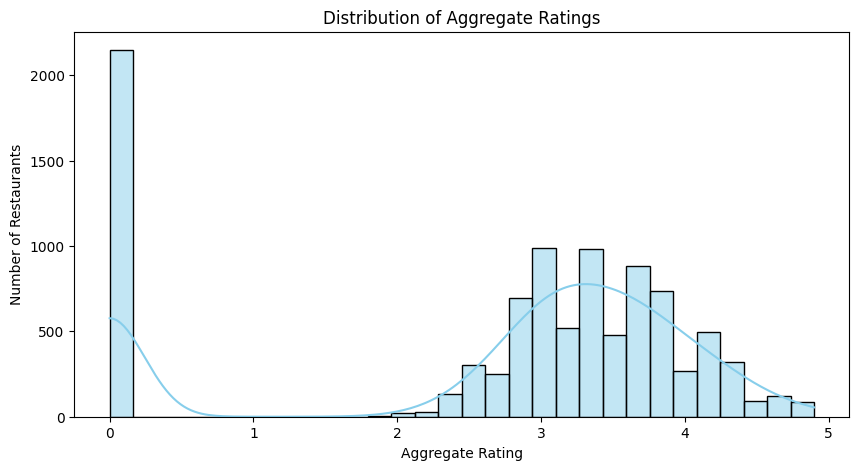

In [ ]:
## 1. Histogram of Aggregate Ratings.

plt.figure(figsize=(10,5))
sns.histplot(data["Aggregate rating"], bins = 30, kde = True, color = "skyblue")
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.show()

* A very large number of restaurants have rating of 0. A zero rating means the restaurant is "Not Rated".

* For restaurants that do have ratings, most are clustered between 2.5 and 4.5.

* If we ignore the zero ratings, the rest of the data looks like a bell curve, with the most common ratings being around 3.0 to 3.5.



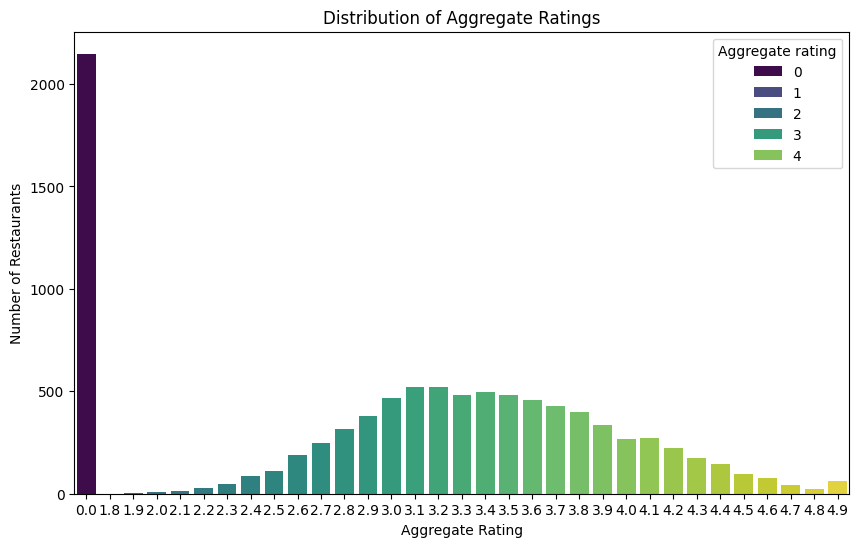

In [28]:
## Bar Plot of Aggregate Ratings.

plt.figure(figsize = (10,6))
sns.countplot(x = "Aggregate rating", hue="Aggregate rating", data=data, palette='viridis')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.show()

* This chart confirms what the histogram showed, the bar for the 0 rating is extremely high, meaning thousands of restaurants are not rated.

* It gives a clear look at the most frequent ratings. We can see the highest bars for actual ratings are between 3.1 and 3.4.



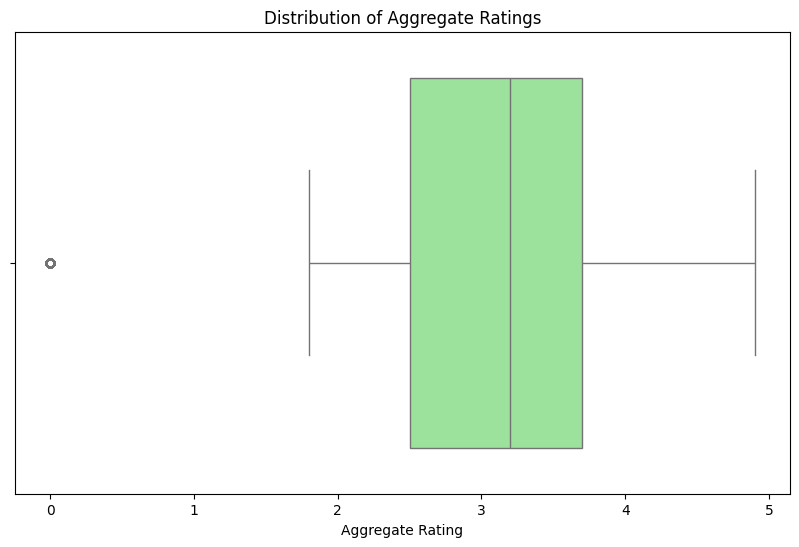

In [29]:
## Box Plot of Aggregate Ratings.

plt.figure(figsize = (10,6))
sns.boxplot(x = data["Aggregate rating"], color = "lightgreen")
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.show()


* The line inside the box shows the median rating, which is about 3.2.

* The plot identifies the rating of 0 as an outlier. This is because it's far away from the main group of ratings.

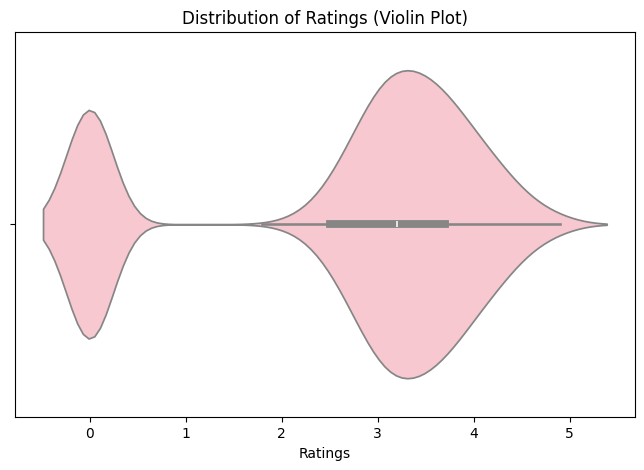

In [ ]:
## Violin Plot of Aggregate Ratings.
plt.figure(figsize=(8,5))
sns.violinplot(x=data["Aggregate rating"], color="pink")
plt.title("Distribution of Ratings (Violin Plot)")
plt.xlabel("Ratings")
plt.show()

* This is the most detailed chart. It shows a small peak at the 0 rating and a much larger, wider group centered around 3.2.

* This shape is widest between 3.0 and 4.0. This means that the highest concentration of restaurant ratings is in this range.

#### 2. Compare the average ratings of different cuisines or cities using appropriate visualizations.

##### We have to understand  something first:-

1. Here Our main goal is to find the true average rating and popularity for each individual cuisine (like 'North Indian', 'Chinese', 'Italian', etc.).

2. The problem is that in our data, a single restaurant have multiple cuisines listed together in one cell, like "North Indian, Chinese, Mughlai". We need a way to analyze each of those cuisines separately to get accurate results.

3. If we don't separate the cuisines, our analysis will be wrong. The computer will mistakenly treat "North Indian, Chinese, Mughlai" as one single, unique cuisine. This means the restaurant's rating won't be counted for the "North Indian" group, the "Chinese" group, or the "Mughlai" group, which gives us incorrect averages.

4. The .explode() method does exactly this for our restaurant data.
It takes one restaurant row that has multiple cuisines and smartly transforms it into multiple rows—creating a separate, clean row for each individual cuisine. The original rating is copied to all the new rows.


In [34]:
## we will make a copy of our original Data set.
new_data = data.copy()

In [ ]:
## Now split the "Cuisines" strings into a list of individual cuisines.
new_data["Cuisines"] = new_data["Cuisines"].apply(lambda x: x.split(',') if x != "Unknown" else [])

In [ ]:
## Now clean up the extra spaces
new_data['Cuisines'] = new_data['Cuisines'].apply(lambda x: [cuisine.strip() for cuisine in x] if isinstance(x, list) else [])

In [38]:
## Now use the explode function to create a new row for each cuisine in the list.
new_data = new_data.explode("Cuisines")

In [48]:
new_data["Cuisines"].value_counts()

Cuisines
North Indian      2992
 Chinese          1880
 Fast Food        1314
 North Indian      968
Chinese            855
                  ... 
Patisserie           1
 D�_ner              1
Turkish Pizza        1
 B�_rek              1
 World Cuisine       1
Name: count, Length: 249, dtype: int64

In [54]:
## Now we will calcualte the average rating for each cuisine.

avg_cuisine_ratings = new_data.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False)
print(avg_cuisine_ratings.head(10))
print(avg_cuisine_ratings.tail(10))

Cuisines
Sunda         4.900000
Cajun         4.700000
Scottish      4.700000
 B�_rek       4.700000
 Caribbean    4.666667
Taiwanese     4.650000
Filipino      4.616667
Persian       4.600000
Ramen         4.600000
Argentine     4.500000
Name: Aggregate rating, dtype: float64
Cuisines
Tibetan           1.727273
 Moroccan         1.620000
Tea               1.541176
 Armenian         1.300000
Nepalese          1.000000
Awadhi            0.760000
Afghani           0.414286
 Mineira          0.000000
 Persian          0.000000
Cuisine Varies    0.000000
Name: Aggregate rating, dtype: float64


##### Things which we have found till now:-

* There are thousands of Popular Cuisines like North Indian, Chinese these restaurants. They are widely available and generally have good, solid ratings, but not the absolute highest.

* Highest-Rated Cuisines (like Sunda, Cajun) are likely very rare. There might only be one or a very small number of restaurants serving them. Because there are so few, if they are very good, they can easily get the highest average rating.

C:\Users\SA\AppData\Local\Temp\ipykernel_3788\1380152068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cuisine_ratings.head(10).index, y=avg_cuisine_ratings.head(10).values, palette="viridis")


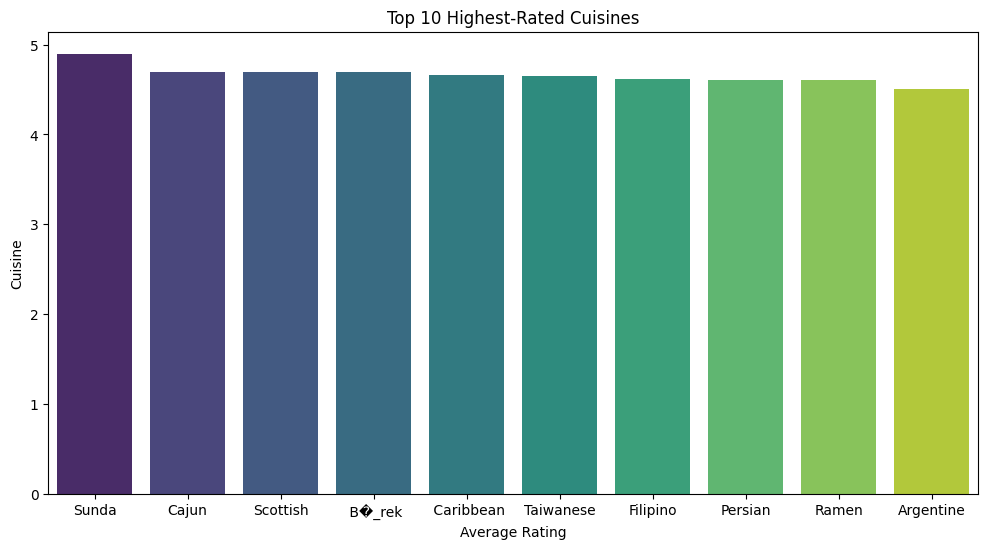

In [58]:
## Create a bar plot for the top 10 cuisines with highest average ratings.

plt.figure(figsize=(12,6))
sns.barplot(x=avg_cuisine_ratings.head(10).index, y=avg_cuisine_ratings.head(10).values, palette="viridis")
plt.title('Top 10 Highest-Rated Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

C:\Users\SA\AppData\Local\Temp\ipykernel_3788\3173106005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cuisine_ratings.tail(10).index, y=avg_cuisine_ratings.tail(10).values, palette="viridis")


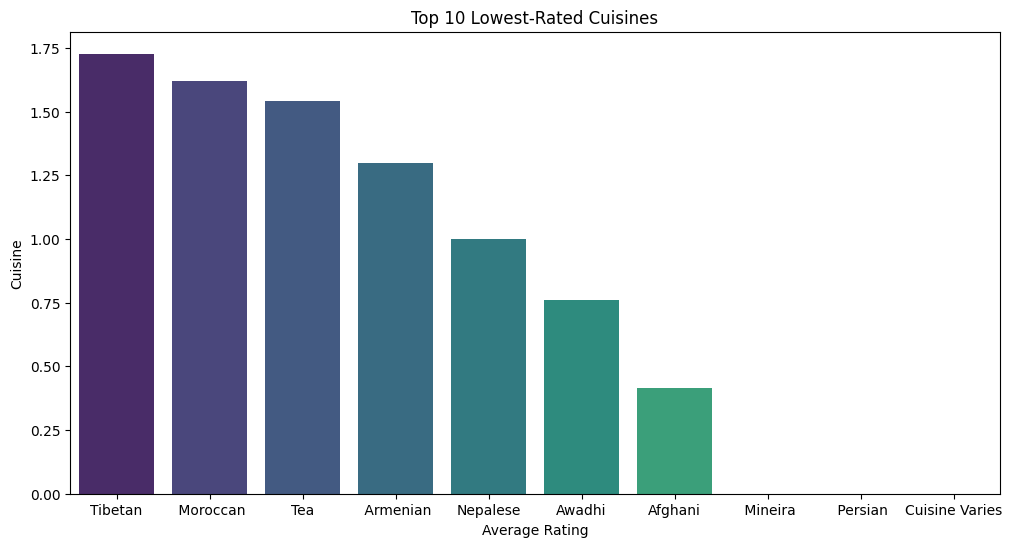

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_cuisine_ratings.tail(10).index, y=avg_cuisine_ratings.tail(10).values, palette="viridis")
plt.title('Top 10 Lowest-Rated Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

##### 3. Visualize the relationship between various features and the target variable to gain insights.

In [98]:
Cleaned_Data.head(5)

,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,Average Cost for Two in INR,Cuisines_Counts
0,1,0,3,4.8,5.752573,8.794976,3
1,1,0,3,4.5,6.383507,8.881975,1
2,1,0,4,4.4,5.602119,10.085851,4
3,0,0,4,4.9,5.902633,9.105091,2
4,1,0,4,4.8,5.438079,9.105091,2


1. Aggregate rating vs Votes

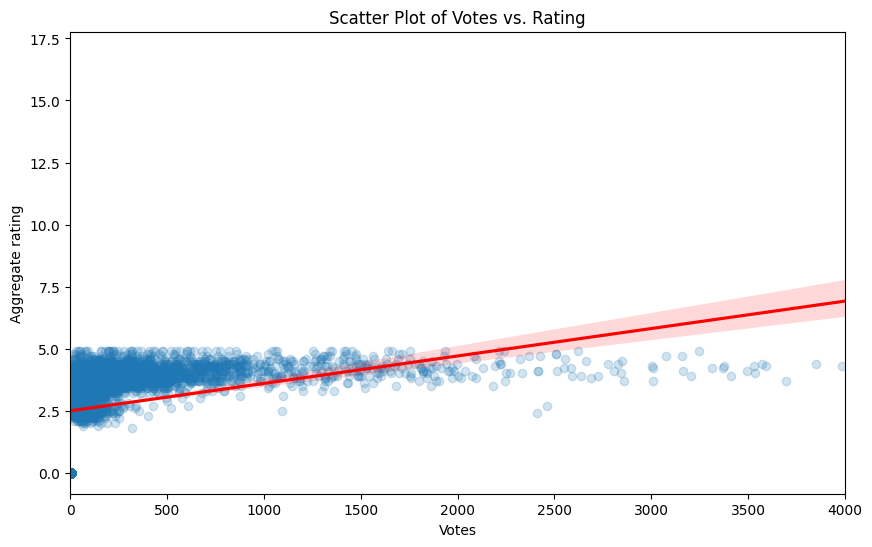

In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='Votes', y='Aggregate rating', 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Votes vs. Rating')
plt.xlim(0, 4000) # Zoom in
plt.show()

* This chart shows the relationship between the number of votes a restaurant gets and its aggregate rating.

* There is a clear positive trend (the red line goes up).

* This means that generally, restaurants with more votes tend to have a higher rating.

2. Aggregate rating VS Price Range

C:\Users\SA\AppData\Local\Temp\ipykernel_3788\3355883082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=Cleaned_Data, x='Price range', y='Aggregate rating', palette='muted')


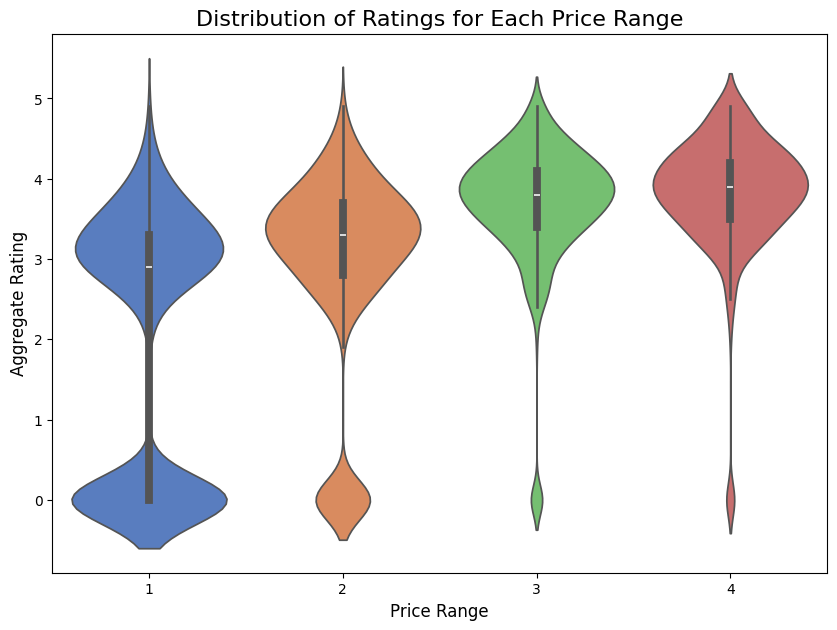

In [ ]:
plt.figure(figsize=(10, 7))
sns.violinplot(data=Cleaned_Data, x='Price range', y='Aggregate rating', palette='muted')
plt.title('Distribution of Ratings for Each Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.show()

* This chart compares the ratings for different price ranges.

* As the price range increases (from 1 to 4), the average rating also increases.

* This suggests that more expensive restaurants in this dataset tend to get better ratings.

3. Aggregate rating Vs Has online delivery

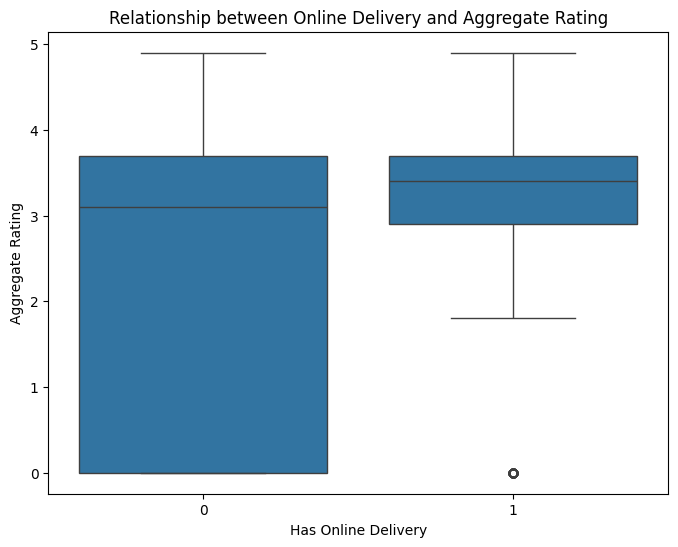

In [100]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=Cleaned_Data, x='Has Online delivery', y='Aggregate rating')
plt.title('Relationship between Online Delivery and Aggregate Rating')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')
plt.show()

* This chart compares ratings for restaurants that offer online delivery versus those that don't.

* Here, the average rating for restaurants without online delivery seems to be slightly higher than for those with it.

* Restaurants that offer online delivery also have a wider variety of ratings (some very good, some very bad).

4. Agrregate rating VS Has Table Booking

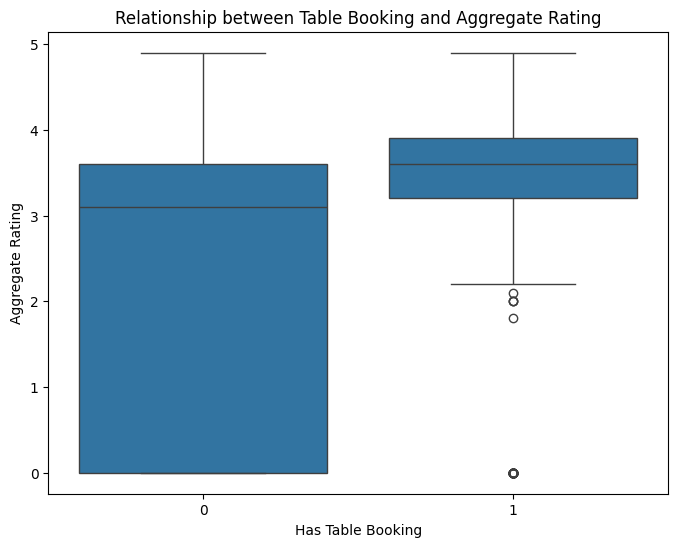

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=Cleaned_Data, x='Has Table booking', y='Aggregate rating')
plt.title('Relationship between Table Booking and Aggregate Rating')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.show()

* This chart compares ratings for restaurants that have a table booking option versus those that don't.

* There is a very clear difference between restaurants that offer table booking having a much higher average rating.

* This is a strong sign that this feature is associated with higher-quality restaurants.

5. Aggregate rating VS No of Cuisines

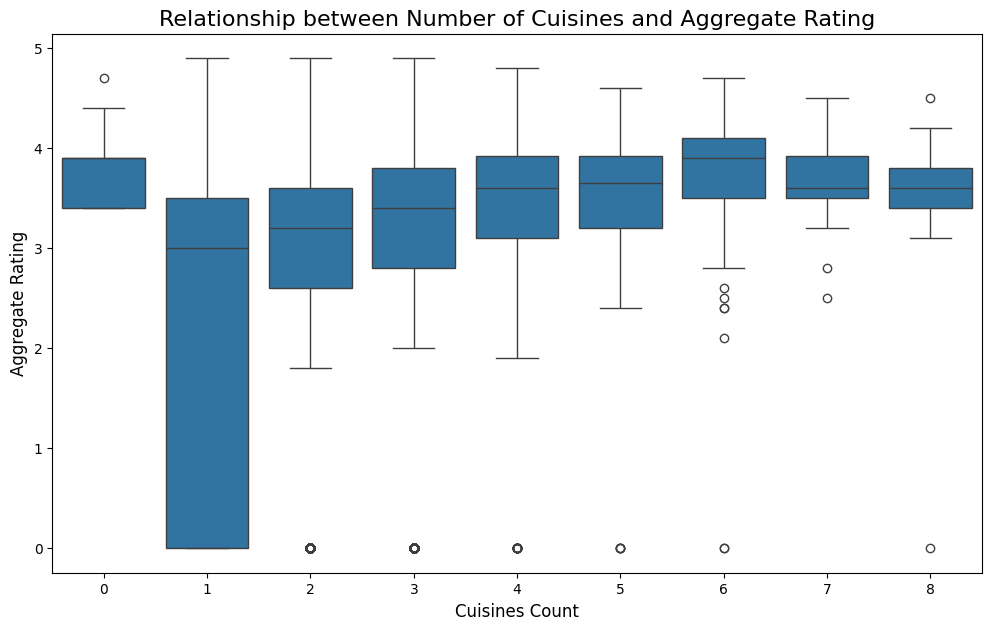

In [103]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=Cleaned_Data, x='Cuisines_Counts', y='Aggregate rating')
plt.title('Relationship between Number of Cuisines and Aggregate Rating', fontsize=16)
plt.xlabel('Cuisines Count', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.show()

* This chart shows how the number of cuisines a restaurant offers relates to its rating.

* Offering just one cuisine seems to have the lowest average rating.

* The sweet spot seems to be offering 3 to 4 cuisines, which have the highest average ratings. Offering more than that doesn't seem to increase the rating further.

### Summary Of This Project.

1. First we Loaded and Cleaned Our Data.

* The dataset has 9551 rows and 21 columns.

* Only the Cuisines column had 9 missing values → filled with "Unknown".

* Data contains numbers (int, float) and text (categorical) values.

2. Exploratory Data Analysis (EDA)

* Ratings:

* Range is 0 to 4.9.

* About 2148 restaurants have 0 rating (unrated).

* Most ratings are between 2.5 and 3.8 (average).

* Very few restaurants have ratings above 4.0 (good).

* The median rating is ~3.3.

* Votes:

* Most restaurants have very few votes.

* Some restaurants have extremely high votes (outliers).

* Cost:

* Most restaurants charge 200–800 for two people.

* A few are very expensive (outliers).

* Cuisines:

* Popular cuisines: North Indian, Chinese, Fast Food.

* Many cuisines appear very rarely.

* City-wise:

* Most restaurants are in Bangalore, Gurgaon, Noida, Delhi.

* Used Folium maps to show restaurant locations.

3. Feature Engineering

* Fixed skewness in data.

* Scaled numbers using StandardScaler.

* Converted text data into numbers (encoding).

4. Machine Learning Models

* Goal: Predict Restaurant Ratings.

Models used:

* Linear Regression

* Decision Tree Regressor

* Random Forest Regressor

* Gradient Boosting Regressor

* XGBoost

* Support Vector Regressor (SVR)

* Metrics used: RMSE, MAE, R² Score.

* // Best Results: Random Forest & Gradient Boosting → high accuracy, low error.

* // Linear Regression & SVR gave weaker results.

5. Visualization Outputs

* Used bar plots, histograms, boxplots for data distribution.

* Heatmaps for correlation.

* Interactive Folium maps for restaurants by city.

### Key Results:-  

##### Restaurant Quality Insights

* Most restaurants are average quality (ratings 2.5–3.8).

* Very few restaurants have ratings above 4.0 → shows that “good quality” restaurants are rare.

##### Customer Engagement (Votes)

* Majority of restaurants get very few votes → low engagement.

* Only a few restaurants are highly popular → good case studies for best practices.

##### Pricing Insights

* Average spending for two people = ₹200–800.

* Expensive restaurants are very few (niche market).

##### Popular Cuisines

* North Indian, Chinese, Fast Food dominate the market.

* Many cuisines are rare → niche opportunity for special cuisines.

##### Location Insights

* Most restaurants are in Bangalore, Gurgaon, Noida, Delhi → shows urban concentration.

* Location data (Folium Maps) helps identify high-density areas for new outlets.

### Machine Learning Predictions

* Tree-based models (Random Forest, Gradient Boosting, XGBoost) predict restaurant ratings with good accuracy.

* This means company can use the model to predict ratings for new restaurants before they open or before investing in them.





## How Companies Can Use These Results:- 

##### Market Strategy

* Focus marketing on cities with high restaurant density (Delhi-NCR, Bangalore).

* For smaller cities, explore niche cuisines (since competition is low).

##### Customer Engagement

* Improve features to increase ratings & votes → rewards, referral systems, discounts.

* Study highly voted restaurants to replicate their success model.

##### Product & Pricing Decisions

* Keep pricing competitive in the ₹200–800 range (mass audience).

* For premium customers, target rare high-cost restaurants.

##### Expansion Opportunities

* Use location maps to find areas with fewer restaurants but high demand potential.

##### Predictive Analytics

* With ML models, predict future restaurant ratings → helps in deciding:

* Which restaurant to invest in.

* Which new cuisine/location will perform well.